Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from numpy import matlib
import qgrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import sys; sys.path.append('../Utils')
from utils import Utils

In [2]:
ut = Utils()

In [11]:
def redes_neuronales(neuronas, capas_ocultas):
    capas = capas_ocultas*(neuronas,)    
        
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = []
    EficienciaVal = []
    skf = []
    f1 = []
    gmean = []
    skf = StratifiedKFold(n_splits=Folds)
    for train, test in skf.split(X, Y):        
        Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X, Y, train, test)
        
        #Llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        mlp = MLPClassifier(hidden_layer_sizes=capas,activation = 'relu', max_iter=1000)
        mlp.fit(Xtrain,Ytrain)
        
        Ytrain_pred = mlp.predict(Xtrain)
        
        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(mlp, Xtrain, Xtest, Ytrain, Ytest)
        
        f1.append(f1_score_current)
        gmean.append(gmean_current)
        
        
        EficienciaTrain.append(eficiencia_train_current)
        EficienciaVal.append(eficiencia_test_current)
        
    f1_m = np.mean(f1)
    f1_ic = np.std(f1)
    gmean = np.mean(gmean)
    gmean_ic = np.std(gmean)
    efi_train = np.mean(EficienciaTrain)
    efi_train_ic = np.std(EficienciaTrain)
    efi_test = np.mean(EficienciaVal)
    efi_test_ic = np.std(EficienciaVal)
    
    print("gmeanIC: ", str(gmean_ic))
    
    
    print("Modelo entrenado con " + str(neuronas) + " neuronas y con " + str(capas_ocultas) + " capas ocultas" + str(capas))
    return str(f1_m), str(f1_ic), str(gmean), str(gmean_ic), str(efi_train), str(efi_train_ic), str(efi_test), str(efi_test_ic)

In [12]:
X, Y = ut.get_matrixes()

In [13]:


df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,
                                       2,2,2,2,2,
                                       3,3,3,3,3,
                                       4,4,4,4,4,
                                       5,5,5,5,5]),
    
    'Neuronas por capa' : pd.Series([10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90,
                                    10,30,50,70,90])})
df_types["F1_Score"] = ""
df_types["IC F1"]= ""
df_types["Gmean"]= ""
df_types["IC Gmean"]= ""
df_types["Eficiencia Train"] = ""
df_types["IC Eficiencia Train"] = ""
df_types["Eficiencia Test"] = ""
df_types["IC Eficiencia Test"] = ""
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)


In [14]:
for cap,neu in df_types.index:
    f1_m, f1_ic, gmean_m, gmean_ic, efi_train, efi_train_ic, efi_test, efi_test_ic =redes_neuronales(neuronas=neu,capas_ocultas=cap)
    df_types["F1_Score"][cap,neu] = f1_m 
    df_types["IC F1"][cap,neu] = f1_ic
    df_types["Gmean"][cap,neu] = gmean_m
    df_types["IC Gmean"][cap,neu] = gmean_ic
    df_types["Eficiencia Train"] = efi_train
    df_types["IC Eficiencia Train"] = efi_train_ic
    df_types["Eficiencia Test"] = efi_test
    df_types["IC Eficiencia Test"] = efi_test_ic
df_types

/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


gmeanIC:  0.0
Modelo entrenado con 10 neuronas y con 1 capas ocultas(10,)
gmeanIC:  0.0
Modelo entrenado con 30 neuronas y con 1 capas ocultas(30,)
gmeanIC:  0.0
Modelo entrenado con 50 neuronas y con 1 capas ocultas(50,)
gmeanIC:  0.0
Modelo entrenado con 70 neuronas y con 1 capas ocultas(70,)
gmeanIC:  0.0
Modelo entrenado con 90 neuronas y con 1 capas ocultas(90,)
gmeanIC:  0.0
Modelo entrenado con 10 neuronas y con 2 capas ocultas(10, 10)
gmeanIC:  0.0
Modelo entrenado con 30 neuronas y con 2 capas ocultas(30, 30)
gmeanIC:  0.0
Modelo entrenado con 50 neuronas y con 2 capas ocultas(50, 50)
gmeanIC:  0.0
Modelo entrenado con 70 neuronas y con 2 capas ocultas(70, 70)
gmeanIC:  0.0
Modelo entrenado con 90 neuronas y con 2 capas ocultas(90, 90)
gmeanIC:  0.0
Modelo entrenado con 10 neuronas y con 3 capas ocultas(10, 10, 10)
gmeanIC:  0.0
Modelo entrenado con 30 neuronas y con 3 capas ocultas(30, 30, 30)
gmeanIC:  0.0
Modelo entrenado con 50 neuronas y con 3 capas ocultas(50, 50, 50)
gm

F1_Score  \
N. de capas ocultas Neuronas por capa                       
1                   10                 0.9148800698147039   
                    30                 0.9195072574038881   
                    50                 0.9264987932085511   
                    70                  0.929823509228975   
                    90                  0.928813178781972   
2                   10                 0.9010515186237291   
                    30                 0.9234345906479341   
                    50                  0.932379011005501   
                    70                 0.9256201349580969   
                    90                 0.9445140815755497   
3                   10                 0.9162457777937311   
                    30                 0.9263433285281644   
                    50                 0.9302124265298151   
                    70                 0.9351013886578075   
                    90                  0.937312847977971   
4                   10                 0.9102573405071761   
                    30                 0.9290744633379378   
                    50                 0.9304433165028168   
                    70                  0.936047304423483   
                    90                 0.9347685360587138   
5                   10                 0.9168605019489131   
                    30                 0.9265224901131902   
                    50                 0.9269961881088131   
                    70                 0.9409307563218281   
                    90                 0.9347248967325782   

                                                      IC F1  \
N. de capas ocultas Neuronas por capa                         
1                   10                  0.02491021557273535   
                    30                  0.03233030246493157   
                    50                 0.030115327265785717   
                    70                  0.02933991066408882   
                    90                 0.030817815534622744   
2                   10                  0.03976692443616972   
                    30                   0.0368033857501755   
                    50                 0.030058410461998787   
                    70                  0.03929588561826741   
                    90                 0.023394027316363655   
3                   10                 0.031578484865336695   
                    30                  0.04104087640813611   
                    50                  0.03631646065593532   
                    70                  0.03689078442995527   
                    90                 0.034165399120836486   
4                   10                  0.03670184626930831   
                    30                  0.03433914608169715   
                    50                  0.04040373853642711   
                    70                 0.042120261601302805   
                    90                  0.03994986648366454   
5                   10                  0.02814522236840656   
                    30                  0.03533648289954969   
                    50                 0.038202840792455804   
                    70                  0.03508512372999549   
                    90                  0.03521798573758628   

                                                    Gmean IC Gmean  \
N. de capas ocultas Neuronas por capa                                
1                   10                 0.9362981918605557      0.0   
                    30                 0.9400909997961546      0.0   
                    50                 0.9455685922704988      0.0   
                    70                 0.9480069646696788      0.0   
                    90                 0.9470918352925362      0.0   
2                   10                 0.9257564160350316      0.0   
                    30                 0.9431266416782483      0.0   
                    50                 0.9496752364071344      0.0   

In [7]:
model = MLPClassifier(hidden_layer_sizes=(70,70,70),activation = 'relu',max_iter=1000)

In [8]:
skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]

    #Se normalizan los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = preprocessing.scale(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
  

In [9]:
model.fit(Xtrain,Ytrain)

MLPClassifier(hidden_layer_sizes=(70, 70, 70), max_iter=1000)

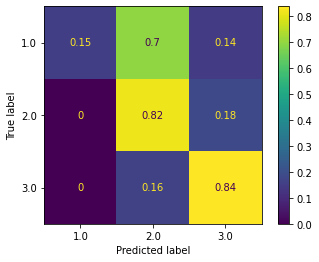

In [10]:
plot_confusion_matrix(model,X=Xtest, y_true=Ytest,normalize='true')